In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# Read the CSV file
df_features = pd.read_csv('Data_Preproc_OneHotEncoding.csv')
df_features.head()

,cap-diameter,stem-height,stem-width,0,1,2,3,4,5,6,...,79,80,81,82,83,84,85,86,87,88
0,15.26,16.95,17.09,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,16.60,17.99,18.19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,14.07,17.80,17.74,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,14.17,15.77,15.98,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,14.64,16.53,17.20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
# Read the labels CSV file
print(df_features.shape)
df_labels = pd.read_csv('Labels.csv')

(61069, 92)


In [4]:
# Unique values in the labels
df_labels['class'].unique()

array(['p', 'e'], dtype=object)

In [16]:
# Retrieve the features and labels
X = df_features.values
y = df_labels.values

# Replace labels with 0 and 1
y[y == 'p'] = 0
y[y == 'e'] = 1

y = [o[0] for o in y]

In [17]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict the labels
y_pred_test = log_reg.predict(X_test)

# Accuracy score
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Logistic Regression Accuracy: 0.7828137280586849
[[6834 1653]
 [1663 5118]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      8487
           1       0.76      0.75      0.76      6781

    accuracy                           0.78     15268
   macro avg       0.78      0.78      0.78     15268
weighted avg       0.78      0.78      0.78     15268



In [8]:
# Random Forest Classifier
rfc = RandomForestClassifier(max_depth=10, n_estimators=100)

# Fit the model
rfc.fit(X_train, y_train)

# Predict the labels
y_pred_test = rfc.predict(X_test)

# Accuracy score
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Random Forest Classifier Accuracy: 0.9700026198585276
[[8292  195]
 [ 263 6518]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8487
           1       0.97      0.96      0.97      6781

    accuracy                           0.97     15268
   macro avg       0.97      0.97      0.97     15268
weighted avg       0.97      0.97      0.97     15268



In [9]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(max_depth=10, n_estimators=100)

# Fit the model
gbc.fit(X_train, y_train)

# Predict the labels
y_pred_test = gbc.predict(X_test)

# Accuracy score
print(f"Gradient Boosting Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Gradient Boosting Classifier Accuracy: 0.9994105318312811
[[8484    3]
 [   6 6775]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8487
           1       1.00      1.00      1.00      6781

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268



In [10]:
# Naive Bayes Classifier
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predict the labels
y_pred_test = gnb.predict(X_test)

# Accuracy score
print(f"Naive Bayes Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Naive Bayes Classifier Accuracy: 0.6043358658632434
[[8284  203]
 [5838  943]]
              precision    recall  f1-score   support

           0       0.59      0.98      0.73      8487
           1       0.82      0.14      0.24      6781

    accuracy                           0.60     15268
   macro avg       0.70      0.56      0.49     15268
weighted avg       0.69      0.60      0.51     15268



In [11]:
# SVM Classifier
from sklearn.svm import SVC
svc = SVC()

# Fit the model
svc.fit(X_train, y_train)

# Predict the labels
y_pred_test = svc.predict(X_test)

# Accuracy score
print(f"SVM Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

SVM Classifier Accuracy: 0.9963321980613047
[[8464   23]
 [  33 6748]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8487
           1       1.00      1.00      1.00      6781

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268



In [12]:
# K-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict the labels
y_pred_test = knn.predict(X_test)

# Accuracy score
print(f"KNN Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

KNN Classifier Accuracy: 0.9988210636625622
[[8479    8]
 [  10 6771]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8487
           1       1.00      1.00      1.00      6781

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268



### Principal Component Analysis

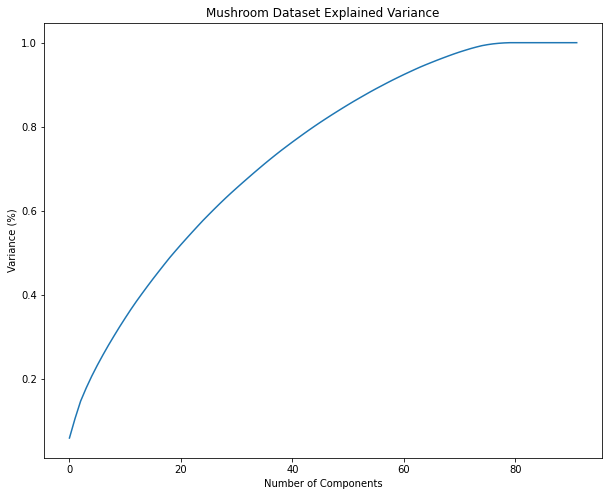

In [18]:
# Import PCA
from sklearn.decomposition import PCA

# Plot the PCA spectrum
pca = PCA().fit(X)

plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Mushroom Dataset Explained Variance')
plt.show()

In [19]:
# Print number of components required to explain 85% of the variance
print(f"Number of components required to explain 85% of the variance: {np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.85) + 1}")

Number of components required to explain 85% of the variance: 51


In [20]:
# Take 85% of the variance
pca = PCA(n_components=51)

# Fit PCA
pca.fit(X)

# Transform the data
X_pca = pca.transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

In [21]:
# Logistic Regression
log_reg_pca = LogisticRegression(max_iter=1000)

# Fit the model
log_reg_pca.fit(X_train, y_train)

# Predict the labels
y_pred_test = log_reg_pca.predict(X_test)

# Accuracy score
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Logistic Regression Accuracy: 0.7385381189415772
[[6543 1944]
 [2048 4733]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      8487
           1       0.71      0.70      0.70      6781

    accuracy                           0.74     15268
   macro avg       0.74      0.73      0.73     15268
weighted avg       0.74      0.74      0.74     15268



In [22]:
# Random Forest Classifier
rfc_pca = RandomForestClassifier(max_depth=10, n_estimators=100)

# Fit the model
rfc_pca.fit(X_train, y_train)

# Predict the labels
y_pred_test = rfc_pca.predict(X_test)

# Accuracy score
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Random Forest Classifier Accuracy: 0.9901755305213519
[[8429   58]
 [  92 6689]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8487
           1       0.99      0.99      0.99      6781

    accuracy                           0.99     15268
   macro avg       0.99      0.99      0.99     15268
weighted avg       0.99      0.99      0.99     15268



In [23]:
# Gradient Boosting Classifier
gbc_pca = GradientBoostingClassifier(max_depth=10, n_estimators=100)

# Fit the model
gbc_pca.fit(X_train, y_train)

# Predict the labels
y_pred_test = gbc_pca.predict(X_test)

# Accuracy score
print(f"Gradient Boosting Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Gradient Boosting Classifier Accuracy: 0.9990830495153262
[[8483    4]
 [  10 6771]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8487
           1       1.00      1.00      1.00      6781

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268



In [24]:
# Naive Bayes Classifier
gnb_pca = GaussianNB()

# Fit the model
gnb_pca.fit(X_train, y_train)

# Predict the labels
y_pred_test = gnb_pca.predict(X_test)

# Accuracy score
print(f"Naive Bayes Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

Naive Bayes Classifier Accuracy: 0.7229499607021221
[[6878 1609]
 [2621 4160]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      8487
           1       0.72      0.61      0.66      6781

    accuracy                           0.72     15268
   macro avg       0.72      0.71      0.71     15268
weighted avg       0.72      0.72      0.72     15268



In [25]:
# SVM Classifier
svc_pca = SVC()

# Fit the model
svc_pca.fit(X_train, y_train)

# Predict the labels
y_pred_test = svc_pca.predict(X_test)

# Accuracy score
print(f"SVM Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

SVM Classifier Accuracy: 0.994629290018339
[[8456   31]
 [  51 6730]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8487
           1       1.00      0.99      0.99      6781

    accuracy                           0.99     15268
   macro avg       0.99      0.99      0.99     15268
weighted avg       0.99      0.99      0.99     15268



In [26]:
# K-nearest neighbors classifier
knn_pca = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_pca.fit(X_train, y_train)

# Predict the labels
y_pred_test = knn_pca.predict(X_test)

# Accuracy score
print(f"KNN Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

# Confusion matrix
print(confusion_matrix(y_test, y_pred_test))

# Classification report
print(classification_report(y_test, y_pred_test))

KNN Classifier Accuracy: 0.9988210636625622
[[8481    6]
 [  12 6769]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8487
           1       1.00      1.00      1.00      6781

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268



In [28]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator=log_reg_pca, n_estimators=100, learning_rate=0.001)

# Fit the model
ada.fit(X_train, y_train)

# Predict the labels
y_pred_test = ada.predict(X_test)

# Accuracy score
print(f"AdaBoost Classifier Accuracy: {accuracy_score(y_test, y_pred_test)}")

AdaBoost Classifier Accuracy: 0.6803772596279801
